In [9]:
car="car1.jpeg"

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [6]:
car1=mpimg.imread('car1.jpeg')

In [7]:
car1.shape

(168, 300, 3)

In [6]:
type(car1)

numpy.ndarray

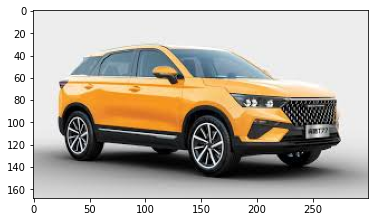

In [7]:
plt.imshow(car1)

In [11]:
#plt.imshow(car)

In [10]:
car1_cv2=cv2.imread('car1.jpeg')
color_car_cv2=cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)

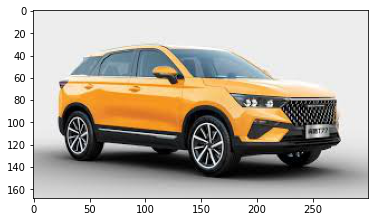

In [11]:
plt.imshow(color_car_cv2)

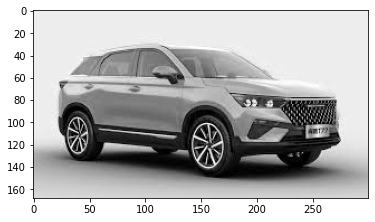

In [22]:
car1_cv2_BGR_Gray=cv2.cvtColor(car1,cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_Gray, cmap="gray")

In [15]:
car1_cv2_BGR_Gray.shape

(168, 300)

In [16]:
car1_cv2_BGR_Gray.min(), car1_cv2_BGR_Gray.max()

(0, 255)

In [18]:
car1_cv2_BGR_Gray[0][0]

237

In [20]:
cv2.imwrite("car_gray.jpeg",car1_cv2_BGR_Gray)

True

In [25]:
car1_cv2_BGR_Gray[0][200]

237

# Visualize all the RGB channel

In [37]:
def visualize_RGB_Channels(imgArray=None, fig_size=(10,7)):
    # spliting the RGB components
    B,G,R=cv2.split(imgArray)
    #zero matrix
    Z=np.zeros(B.shape,dtype=B.dtype)
    #initilize subplot
    fig,ax=plt.subplots(2,2, figsize=fig_size)
    [axi.set_axis_off() for axi in ax.ravel()]
    ax[0,0].set_title("Original image")
    ax[0,0].imshow(cv2.merge((R,G,B)))
    ax[0,1].set_title("Red Chanel")
    ax[0,1].imshow(cv2.merge((R,Z,Z)))
    ax[1,0].set_title("Green Chanel")
    ax[1,0].imshow(cv2.merge((Z,G,Z)))
    ax[1,1].set_title("Blue Chanel")
    ax[1,1].imshow(cv2.merge((Z,Z,B)))

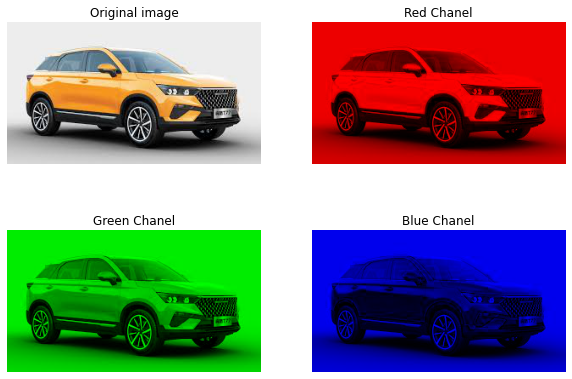

In [38]:
visualize_RGB_Channels(imgArray=car1_cv2)

In [40]:
random_colored_image=np.random.randint(0,255,(6,6,3))
random_colored_image.shape

(6, 6, 3)

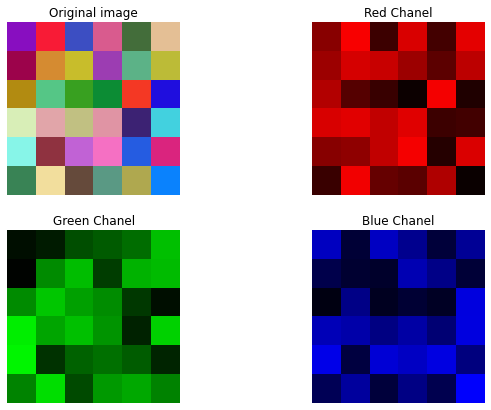

In [41]:
visualize_RGB_Channels(imgArray=random_colored_image)

In [42]:
random_colored_image[0,0:]

array([[192,  14, 136],
       [ 54,  27, 248],
       [194,  78,  60],
       [142,  91, 217],
       [ 58, 109,  67],
       [149, 191, 228]])

In [43]:
random_colored_image[0,0,:]

array([192,  14, 136])

In [44]:
random_colored_image[-1,-1,:]

array([253, 130,  10])

# Filters

In [45]:
sobel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print(sobel)

[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [46]:
sobel.T

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [47]:
example1=[[0,0,0,255,255,255],
          [0,0,0,255,255,255],
          [0,0,0,255,255,255],
          [0,0,0,255,255,255],
          [0,0,0,255,255,255],
          [0,0,0,255,255,255]]

In [48]:
example1=np.array(example1)

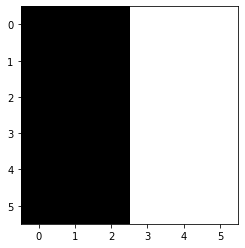

In [50]:
plt.imshow(example1, cmap="gray")

# Apply filter on this image

In [93]:
def find_edges(imgFilter=None, picture=None):
    # extract row and column of an input picture
    p_row,p_col=picture.shape
    k=imgFilter.shape[0]
    temp=list()
    strides=1
    #resultant rows and columns
    final_columns=(p_col -k)//strides +1
    
    final_rows=(p_row -k)//strides +1
    #take vertically down sr´tride accross row by row
    for v_stride in range(final_rows):
        for h_stride in range(final_columns):
            target_area_of_pic=picture[v_stride:v_stride +k, h_stride:h_stride+k]
            temp.append(sum(sum(imgFilter* target_area_of_pic)))
    #print(temp)
    return np.array(temp).reshape(final_rows,final_columns)
            

In [76]:
result=find_edges(sobel, example1)
result
sum(sum(result))

[0, -1020, -1020, 0, 0, -1020, -1020, 0, 0, -1020, -1020, 0, 0, -1020, -1020, 0]


-8160

In [77]:
example1

array([[  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255]])

In [78]:
sum(example1)

array([   0,    0,    0, 1530, 1530, 1530])

In [79]:
sum(sum(example1))

4590

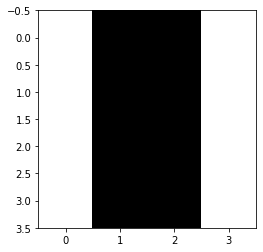

In [80]:
plt.imshow(result, cmap="gray")

In [71]:
sobel.T

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

In [73]:
result_T=find_edges(sobel.T, example1)
result_T

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

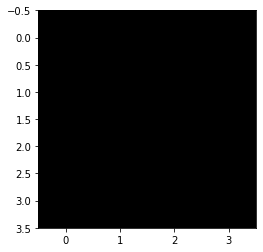

In [74]:
plt.imshow(result_T, cmap="gray")

In [81]:
example1

array([[  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255]])

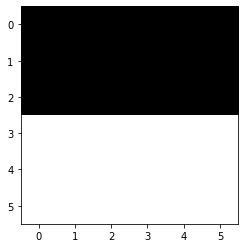

In [86]:
example_T=example1.T
plt.imshow(example_T,cmap="gray")

In [85]:
result_T1=find_edges(sobel.T, example_T)
result_T1

[0, 0, 0, 0, -1020, -1020, -1020, -1020, -1020, -1020, -1020, -1020, 0, 0, 0, 0]


array([[    0,     0,     0,     0],
       [-1020, -1020, -1020, -1020],
       [-1020, -1020, -1020, -1020],
       [    0,     0,     0,     0]])

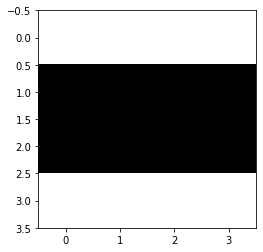

In [87]:
plt.imshow(result_T1, cmap="gray")

In [94]:
result_car=find_edges(sobel,car1_cv2_BGR_Gray)
result_car

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

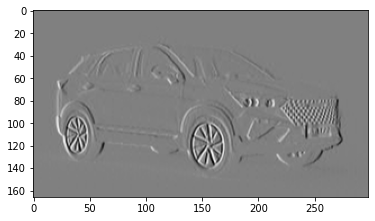

In [95]:
plt.imshow(result_car, cmap="gray")

# lets now apply horizontal edges

In [96]:
result_car_hor=find_edges(sobel.T, car1_cv2_BGR_Gray)

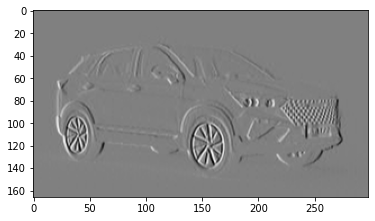

In [92]:
plt.imshow(result_car, cmap="gray")

In [97]:
example1

array([[  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255],
       [  0,   0,   0, 255, 255, 255]])

In [102]:
example1=[[0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0],
          [0,0,0,0,255,255,255,255,0,0,0,0]]

In [103]:
example1=np.array(example1)

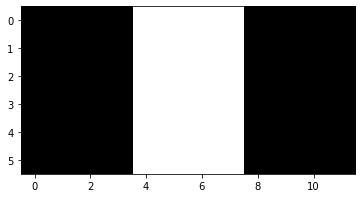

In [104]:
plt.imshow(example1, cmap="gray")

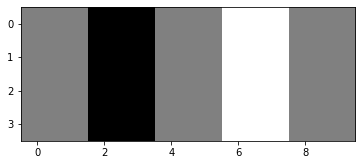

In [105]:
result=find_edges(sobel, example1)
plt.imshow(result, cmap="gray")